# Table of Contents

[Preparation](#preparation)

[User data vectors](#userdatavectors)

[Graphs](#graphs)


# Preparation
<a id=preparation />

In [1]:
%run "../Functions/4. User comparison.ipynb"

C:\Users\Mikael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (24,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data vectors of users
<a id=userdatavectors />

In [2]:
# small sample
#allData = getAllUserVectorData( getAllUsers( df152 )[:10] )

# complete set
allData = getAllUserVectorData( getAllUsers( df152 ) )

# subjects which answered the gform
#allData = getAllUserVectorData( getAllResponders() )

"4dbc2f43-421c-4e23-85d4-f17723ff8c66"
"1a8924de-7cc6-4ff5-8735-4cddac309117"
"a6483353-5db1-4c6c-98d7-b6328d0f4456"
"0fa88384-3115-4ebd-990d-6bd29214c04f"
"1f742172-0443-4fc7-b38a-621fa62b323f"
"8116ab59-446b-4dfb-8154-445f5ac84a1e"
"9abd384c-2f36-4de6-8cd4-af32cb2459ff"
"a151ad65-75fd-4dc1-b466-8852e6f085d2"
"4c617aef-2e03-4f56-b863-89d4f44128ef"
"7412a447-8177-48e9-82c5-cb31032f76a9"
"65492b06-bb06-4c32-8c50-dda00072a4fd"
"03e29e72-3bdd-4bc0-9556-20353e531368"
"556c432b-3012-4011-bbfe-02d7c7dd8d19"
"f0dd0ffb-a9f6-4296-8efb-931d0ffb85c5"
"9880ce9d-c6fc-476e-98a9-a9e8c8f7fcdc"
"a4d4b030-9117-4331-ba48-90dc05a7e65a"
"7cece567-45d0-42e7-9870-3f83fb7de271"
"d6826fd9-a6fc-4046-b974-68e50576183f"
"a8ba2b83-c911-489c-98be-5fde646c46de"
"3e63314c-ee95-4ae2-ae61-05e96679bf29"
"b0975446-f9a9-4356-b78d-4db9024e5369"
"8623c816-90d9-4c32-9b18-6741f6ad85bd"
"12878b14-3775-4853-84c7-6d19c9908513"
"4da22c18-bc3c-4743-a733-b9b41f329ece"
"a9bea090-2e7b-491a-a92f-f5ad451d9569"
"f539aa36-af94-4c0e-ac21-

# Graphs
<a id=graphs />

In [3]:
columnAllData = allData.T
columnAllData['score'][:5]

"4dbc2f43-421c-4e23-85d4-f17723ff8c66"   NaN
"1a8924de-7cc6-4ff5-8735-4cddac309117"   NaN
"a6483353-5db1-4c6c-98d7-b6328d0f4456"   NaN
"0fa88384-3115-4ebd-990d-6bd29214c04f"   NaN
"1f742172-0443-4fc7-b38a-621fa62b323f"   NaN
Name: score, dtype: float64

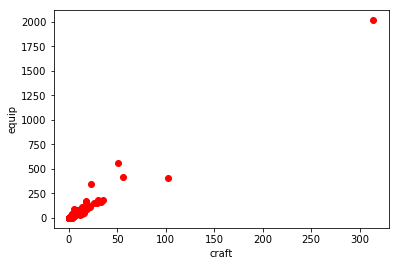

In [24]:
plt.plot(columnAllData['craft'], columnAllData['equip'], 'ro')
plt.xlabel('craft')
plt.ylabel('equip')

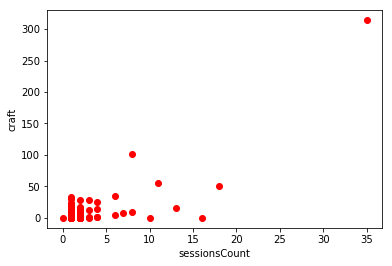

In [23]:
plt.plot(columnAllData['sessionsCount'], columnAllData['craft'], 'ro')
plt.xlabel('sessionsCount')
plt.ylabel('craft')

In [6]:
columnAllData.columns

Index(['score', 'sessionsCount', 'complete', 'configure', 'craft', 'death',
       'equip', 'gotomooc', 'gotourl', 'pickup', 'reach', 'restart',
       'selectmenu', 'start', 'switch', 'unequip'],
      dtype='object')

In [9]:
for column in columnAllData.columns:
    print(column)

score
sessionsCount
complete
configure
craft
death
equip
gotomooc
gotourl
pickup
reach
restart
selectmenu
start
switch
unequip


In [21]:
columnAllData.columns[1]

'sessionsCount'

In [16]:
len(columnAllData.columns)

16

In [22]:
for i in range(1,len(columnAllData.columns)):
    for j in range(i+1,len(columnAllData.columns)):
        print(i,j)
        print(columnAllData.columns[i], columnAllData.columns[j])

1 2
sessionsCount complete
1 3
sessionsCount configure
1 4
sessionsCount craft
1 5
sessionsCount death
1 6
sessionsCount equip
1 7
sessionsCount gotomooc
1 8
sessionsCount gotourl
1 9
sessionsCount pickup
1 10
sessionsCount reach
1 11
sessionsCount restart
1 12
sessionsCount selectmenu
1 13
sessionsCount start
1 14
sessionsCount switch
1 15
sessionsCount unequip
2 3
complete configure
2 4
complete craft
2 5
complete death
2 6
complete equip
2 7
complete gotomooc
2 8
complete gotourl
2 9
complete pickup
2 10
complete reach
2 11
complete restart
2 12
complete selectmenu
2 13
complete start
2 14
complete switch
2 15
complete unequip
3 4
configure craft
3 5
configure death
3 6
configure equip
3 7
configure gotomooc
3 8
configure gotourl
3 9
configure pickup
3 10
configure reach
3 11
configure restart
3 12
configure selectmenu
3 13
configure start
3 14
configure switch
3 15
configure unequip
4 5
craft death
4 6
craft equip
4 7
craft gotomooc
4 8
craft gotourl
4 9
craft pickup
4 10
craft rea

In [66]:
def plotFromAllUsersData(allUsersData, xcolumnname, ycolumnname):
    plt.title("plotting '" + ycolumnname + "' against '" + xcolumnname + "'")
    plt.plot(
                allUsersData[xcolumnname],
                allUsersData[ycolumnname],
                'ro'
            )
    plt.xlabel(xcolumnname)
    plt.ylabel(ycolumnname)
    #plt.show()

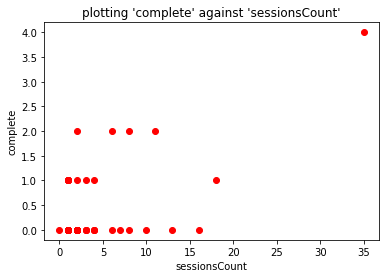

In [63]:
plotFromAllUsersData(
                        columnAllData,
                        columnAllData.columns[1],
                        columnAllData.columns[2]
                    )

# Subplot tests

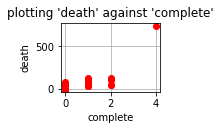

In [65]:
plt.figure(1)

#plt.subplot(131)
plt.subplot(311)
plotFromAllUsersData(
                        columnAllData,
                        columnAllData.columns[2],
                        columnAllData.columns[3]
                    )

plt.grid(True)

#plt.subplot(132)
plt.subplot(321)
plotFromAllUsersData(
                        columnAllData,
                        columnAllData.columns[2],
                        columnAllData.columns[4]
                    )
plt.grid(True)

#plt.subplot(133)
plt.subplot(331)
plotFromAllUsersData(
                        columnAllData,
                        columnAllData.columns[2],
                        columnAllData.columns[5]
                    )
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

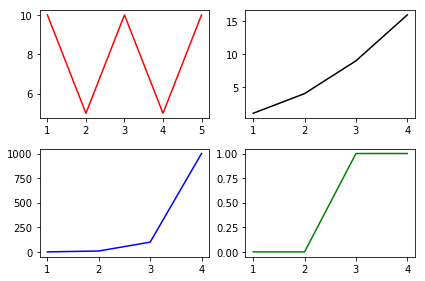

In [68]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.plot([1,2,3,4,5], [10,5,10,5,10], 'r-')

ax2 = fig.add_subplot(222)
ax2.plot([1,2,3,4], [1,4,9,16], 'k-')

ax3 = fig.add_subplot(223)
ax3.plot([1,2,3,4], [1,10,100,1000], 'b-')

ax4 = fig.add_subplot(224)
ax4.plot([1,2,3,4], [0,0,1,1], 'g-')


plt.tight_layout()
fig = plt.gcf()

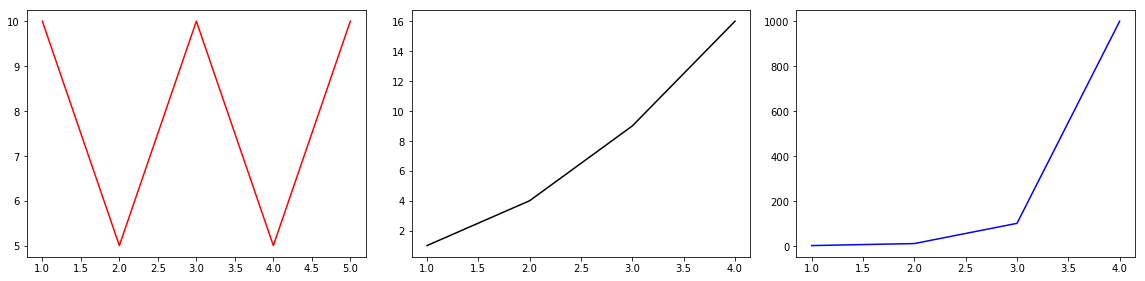

In [82]:
fig = plt.figure(figsize=(16,4))


ax1 = fig.add_subplot(131)
ax1.plot([1,2,3,4,5], [10,5,10,5,10], 'r-')


ax2 = fig.add_subplot(132)
ax2.plot([1,2,3,4], [1,4,9,16], 'k-')


ax3 = fig.add_subplot(133)
ax3.plot([1,2,3,4], [1,10,100,1000], 'b-')


plt.tight_layout()

fig = plt.gcf()

In [98]:
def subplotFromAllUsersData(ax, allUsersData, xcolumnname, ycolumnname):
    plt.title("'" + ycolumnname + "' against '" + xcolumnname + "'")
    ax.plot(
                allUsersData[xcolumnname],
                allUsersData[ycolumnname],
                'ro'
            )
    plt.xlabel(xcolumnname)
    plt.ylabel(ycolumnname)
    #plt.show()

In [ ]:
fig = plt.figure(figsize=(16,4))


ax1 = fig.add_subplot(131)
subplotFromAllUsersData(
                        ax1,
                        columnAllData,
                        columnAllData.columns[2],
                        columnAllData.columns[3]
                    )


ax2 = fig.add_subplot(132)
subplotFromAllUsersData(
                        ax2,
                        columnAllData,
                        columnAllData.columns[2],
                        columnAllData.columns[4]
                    )


ax3 = fig.add_subplot(133)
subplotFromAllUsersData(
                        ax3,
                        columnAllData,
                        columnAllData.columns[2],
                        columnAllData.columns[5]
                    )


plt.tight_layout()

fig = plt.gcf()

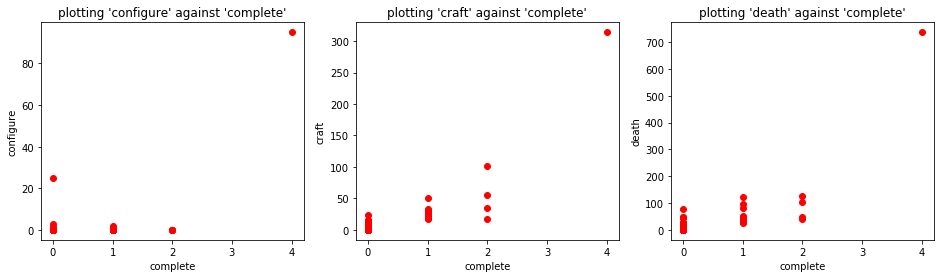

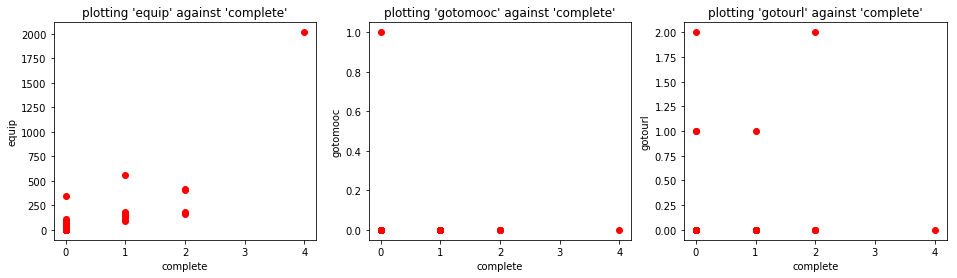

In [95]:
for i in range(0,6):
    position = 131 + (i % 3)

    if i % 3 == 0:
        fig = plt.figure(figsize=(16,4))

    ax1 = fig.add_subplot(position)
    subplotFromAllUsersData(
                            ax1,
                            columnAllData,
                            columnAllData.columns[2],
                            columnAllData.columns[3+i]
                        )

# Automation tests

In [47]:
len(columnAllData.columns)

16

In [49]:
graphsCount = len(columnAllData.columns) * (len(columnAllData.columns) - 1) / 2
graphsCount

120.0

In [50]:
graphsProgressBar = FloatProgress(min=0, max=graphsCount)
display(graphsProgressBar)

## 1 column of graphs

In [ ]:
graphsProgressBar.value = 0
for i in range(0,len(columnAllData.columns)):
    xcolumnname = columnAllData.columns[i]
    for j in range(i+1,len(columnAllData.columns)):
        ycolumnname = columnAllData.columns[j]
        plotFromAllUsersData(columnAllData, xcolumnname, ycolumnname)
        graphsProgressBar.value += 1
print("done in " + str(graphsProgressBar.value) + " steps.")

## 3 columns of graphs

done in 120.0 steps.


C:\Users\Mikael\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


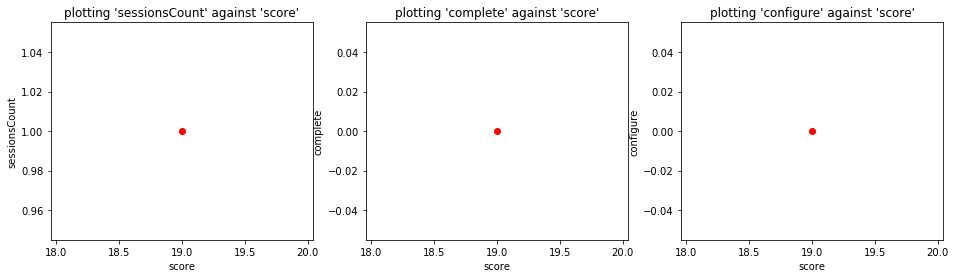

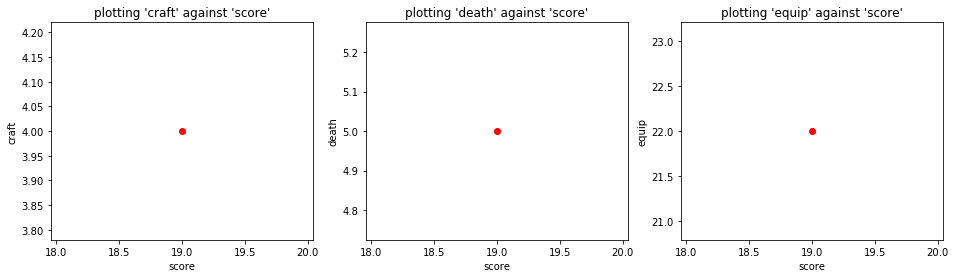

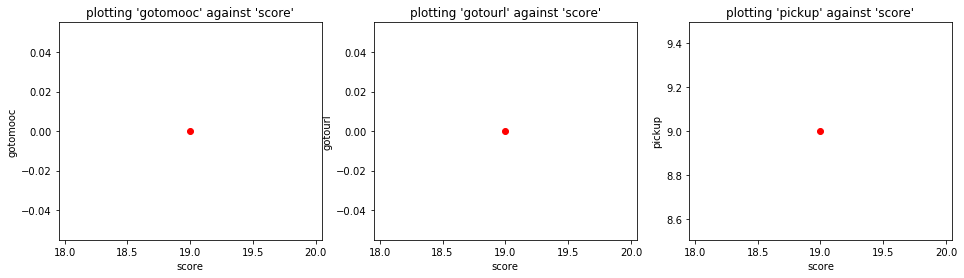

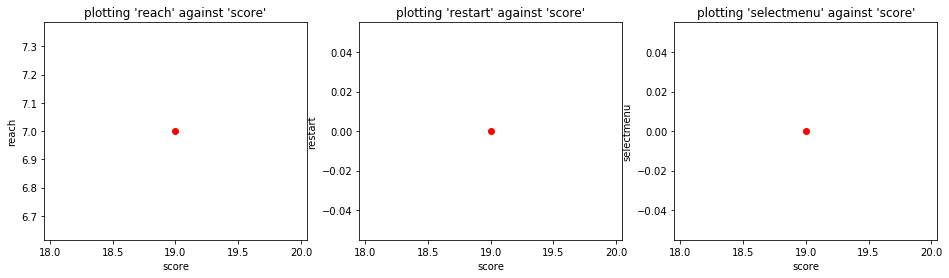

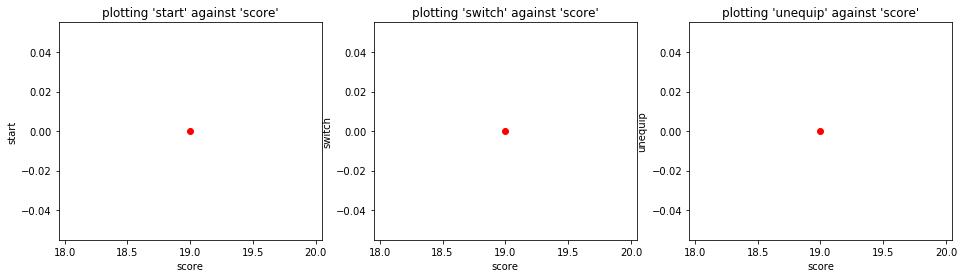

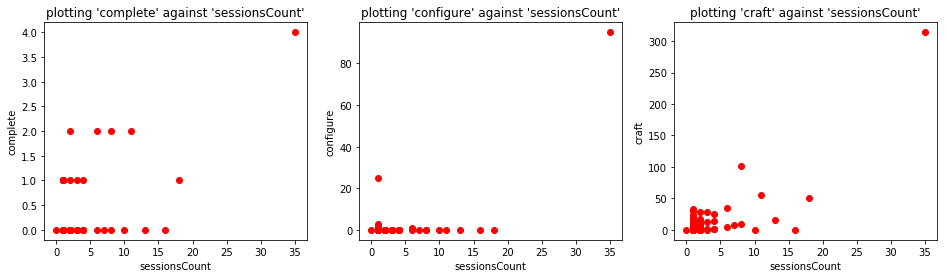

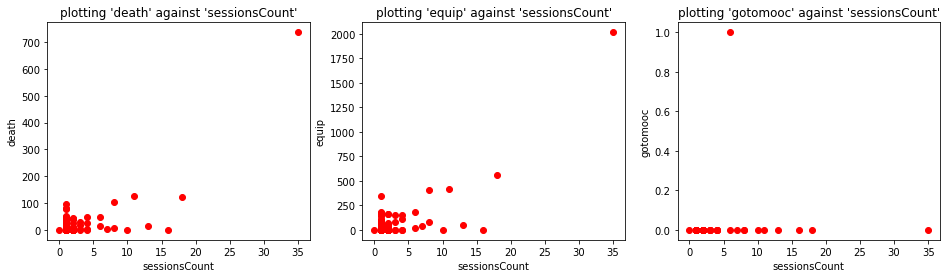

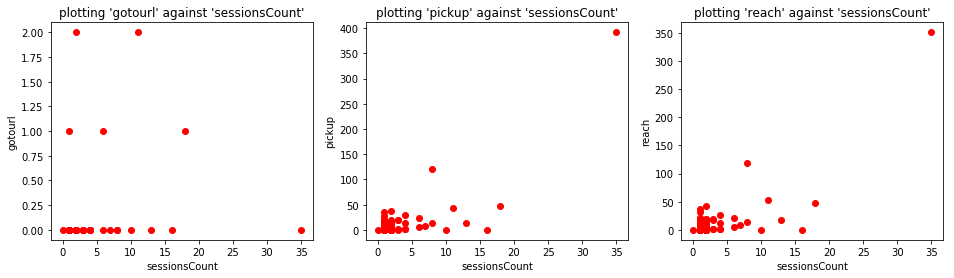

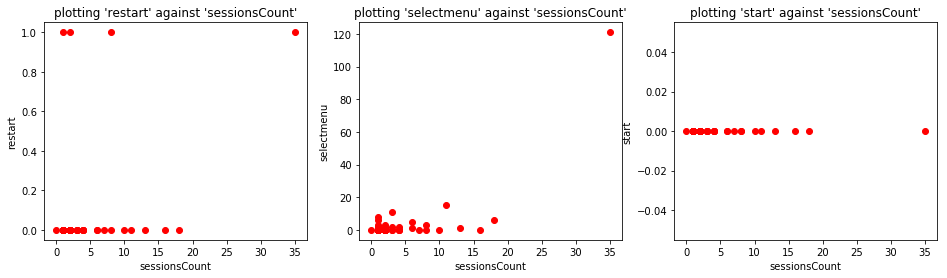

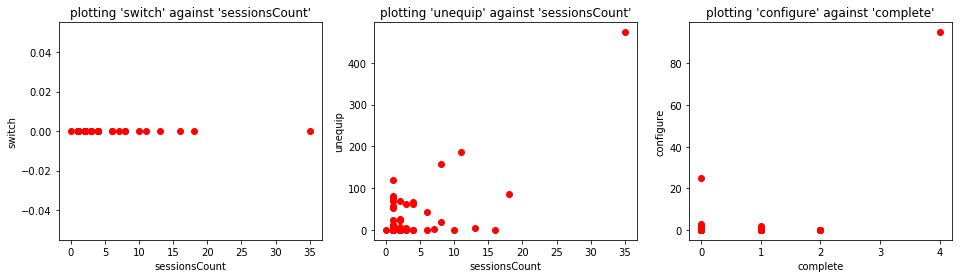

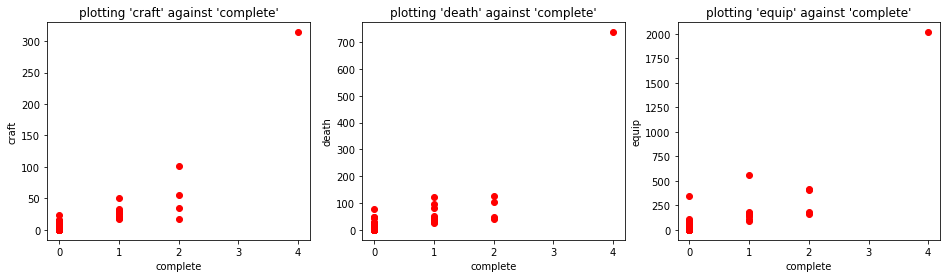

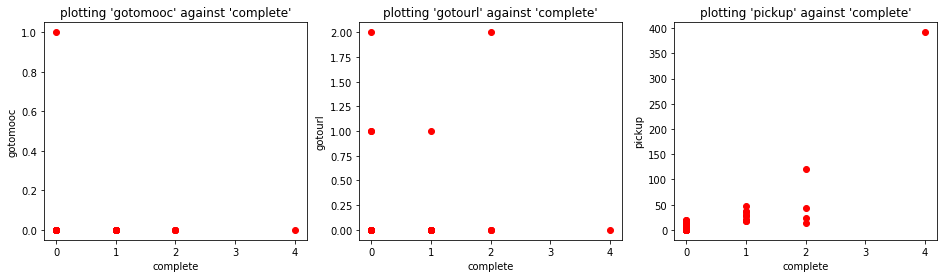

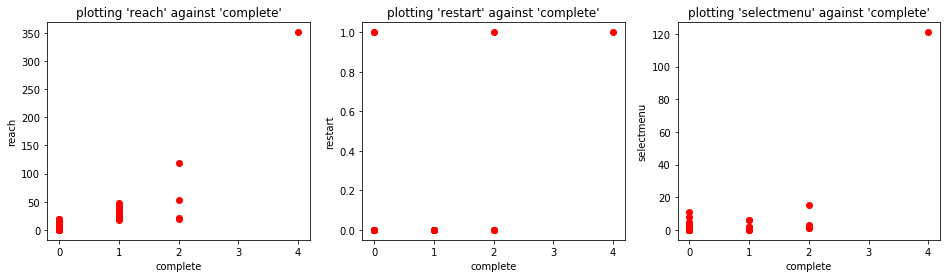

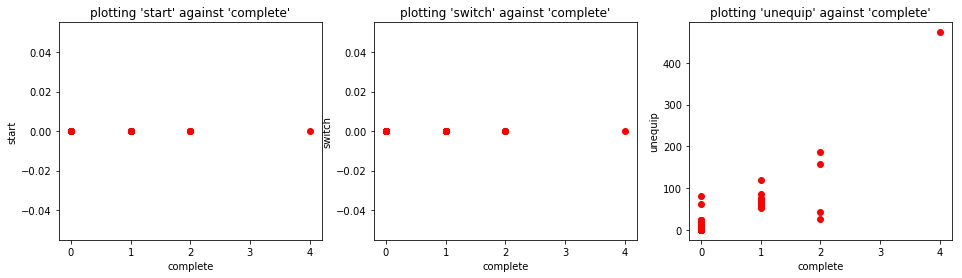

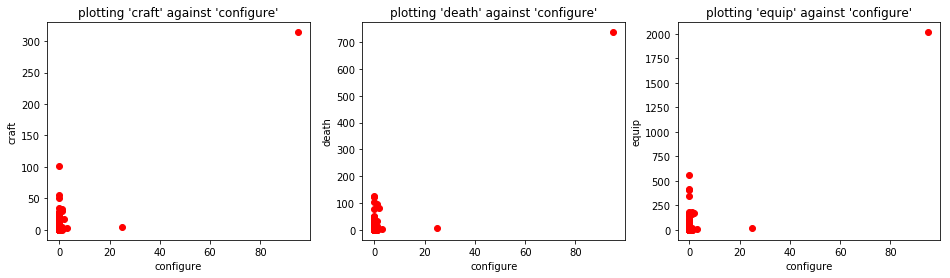

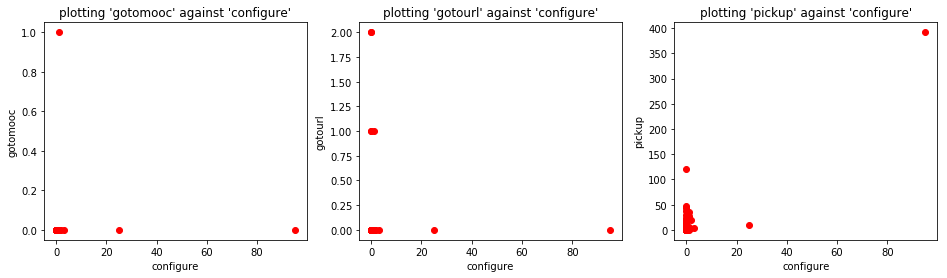

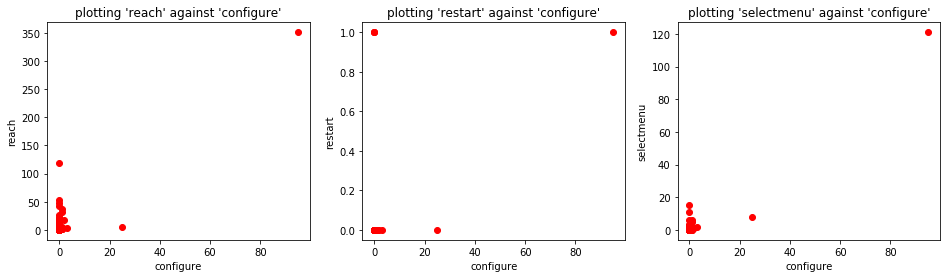

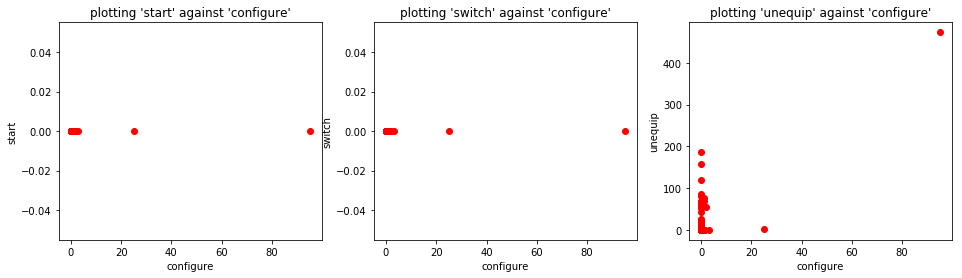

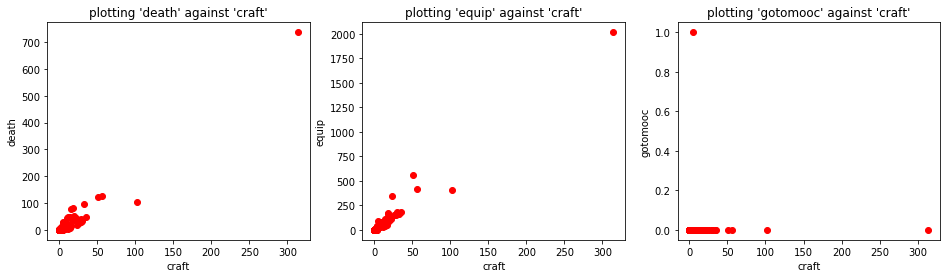

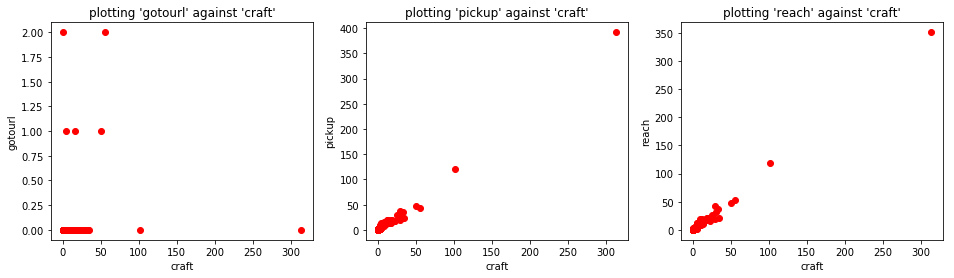

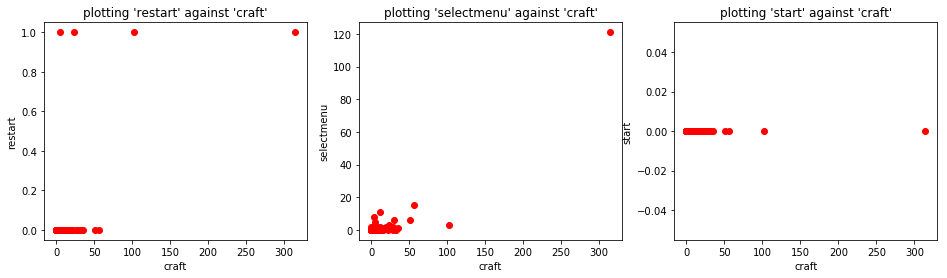

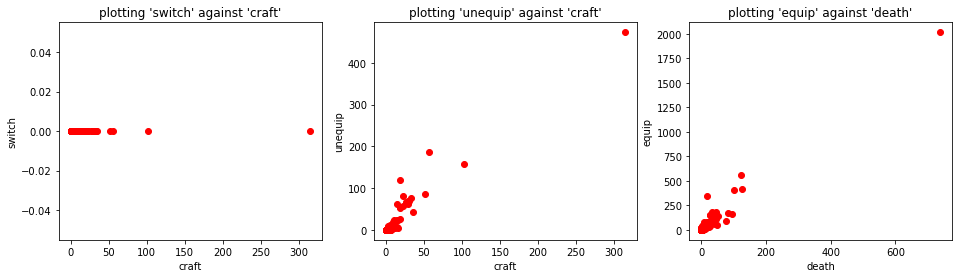

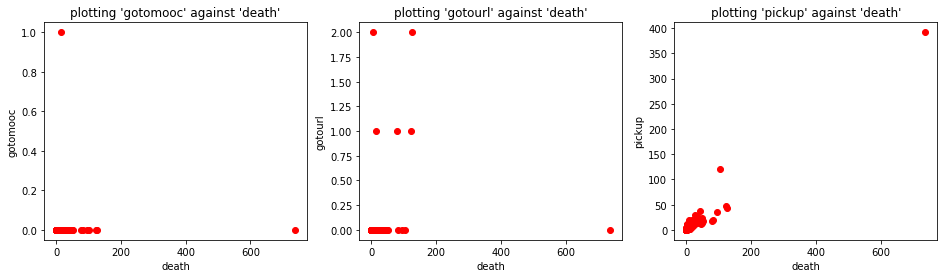

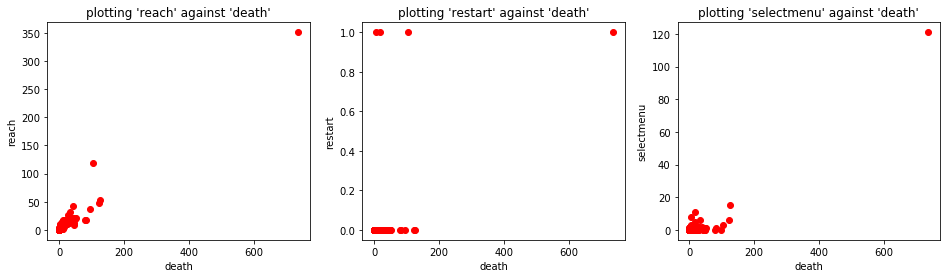

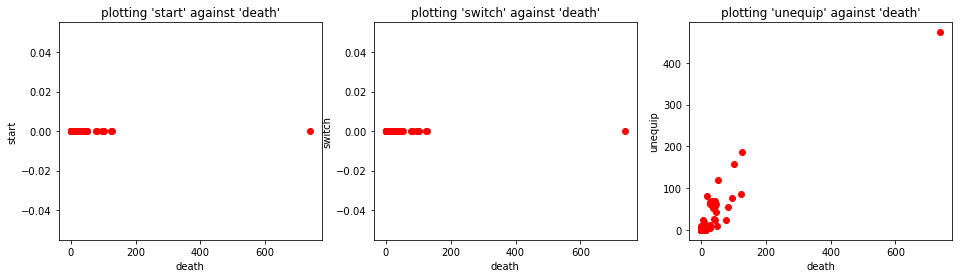

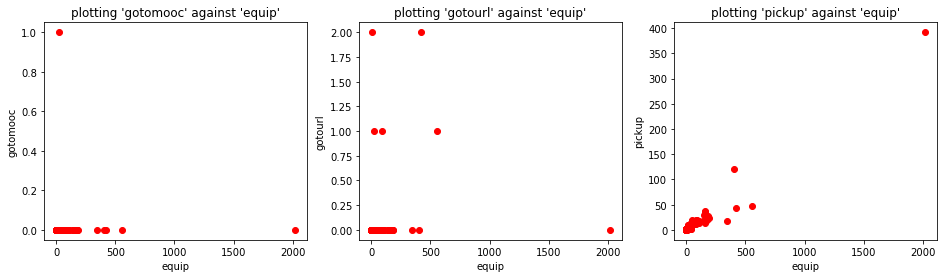

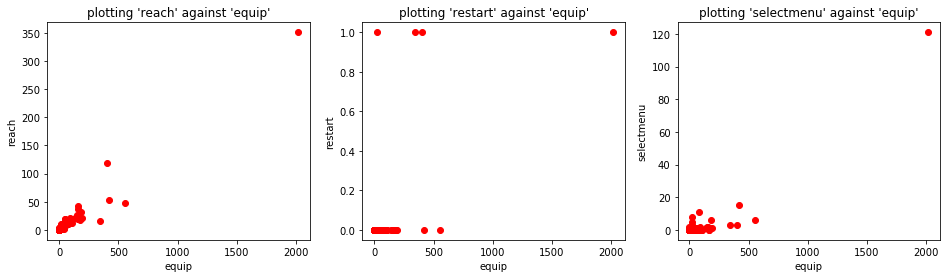

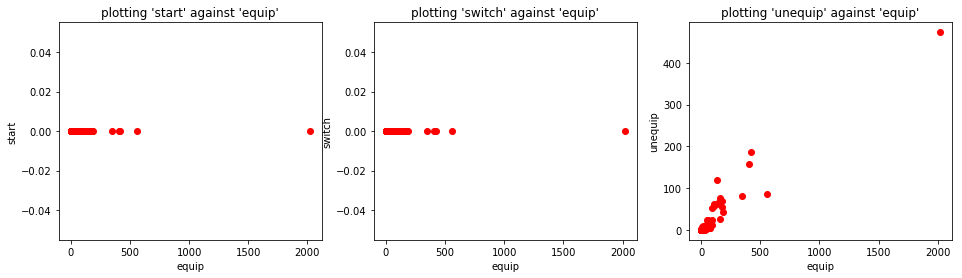

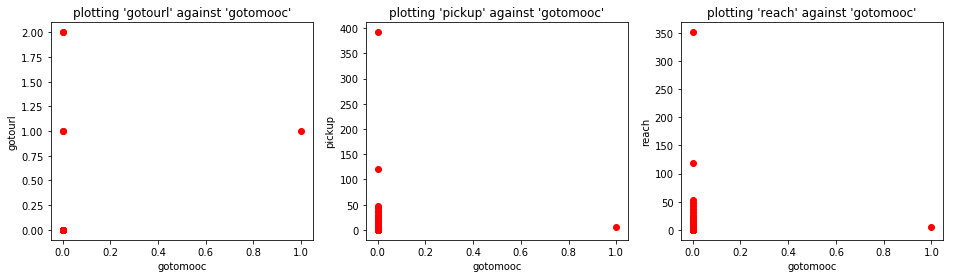

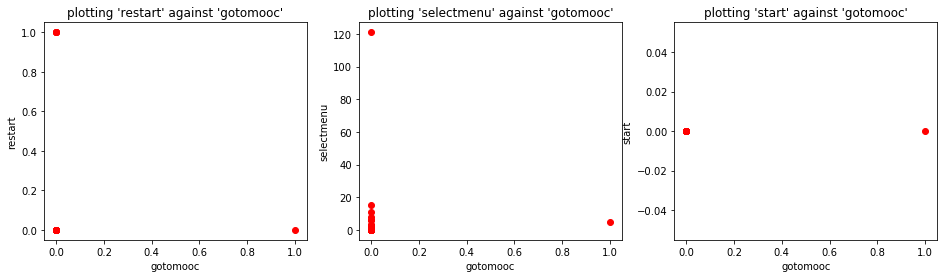

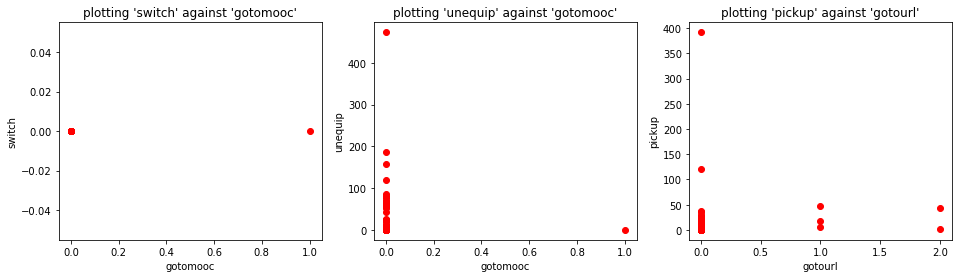

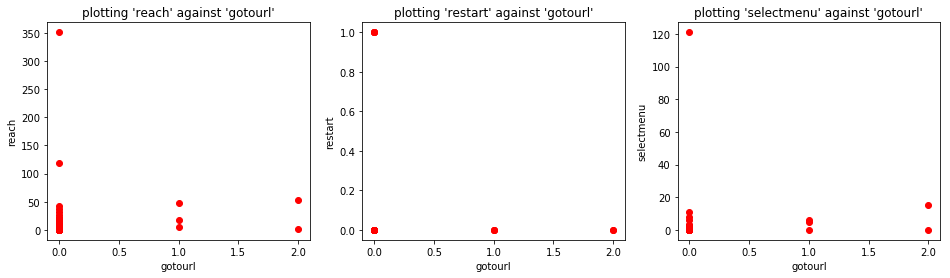

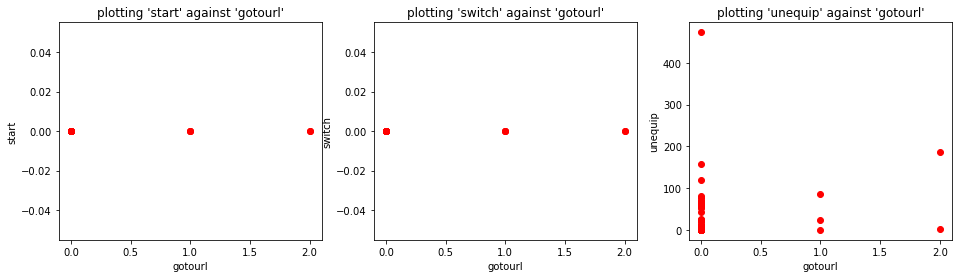

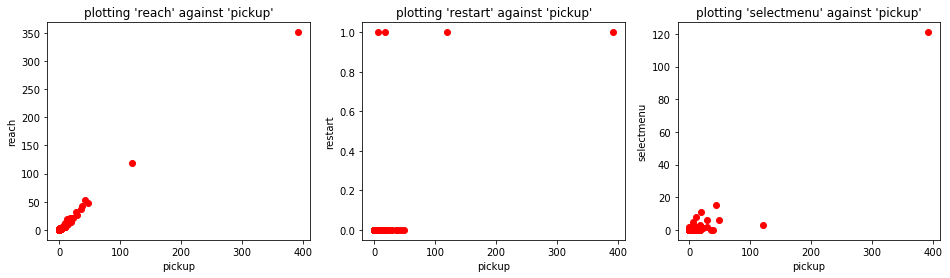

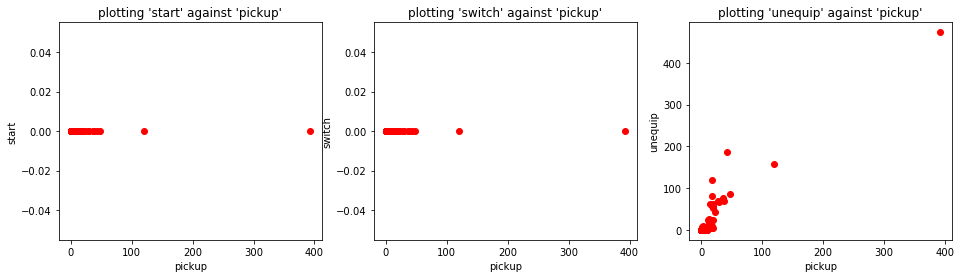

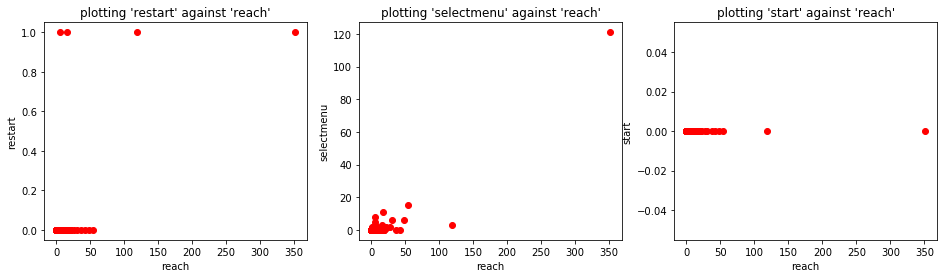

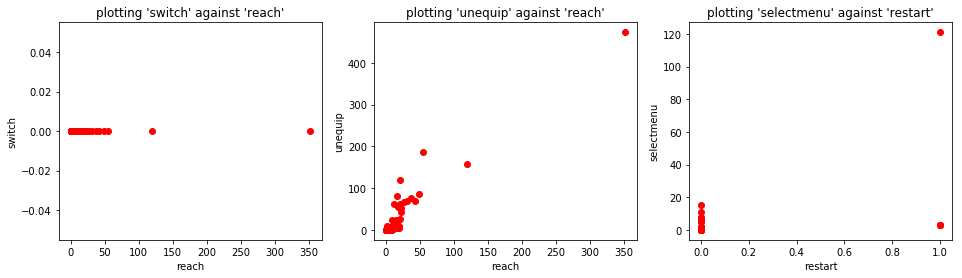

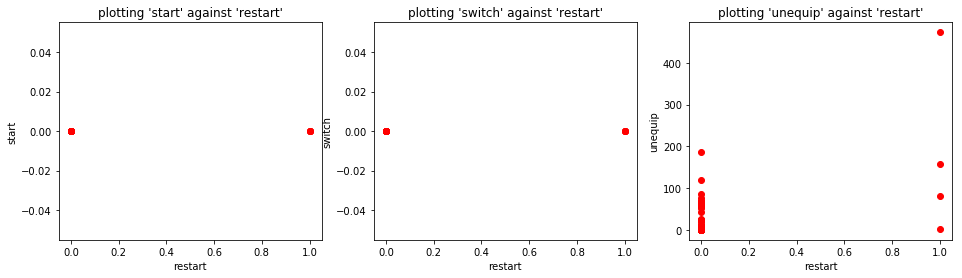

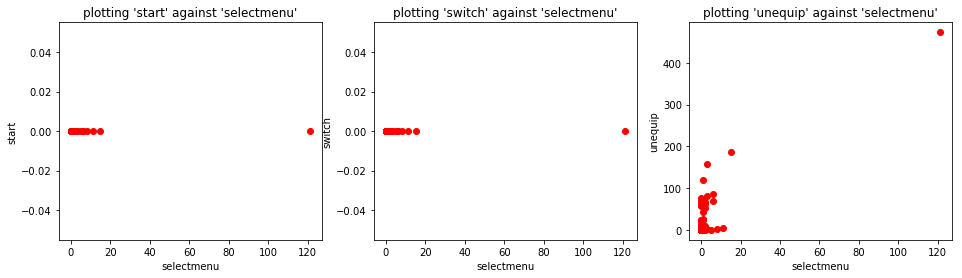

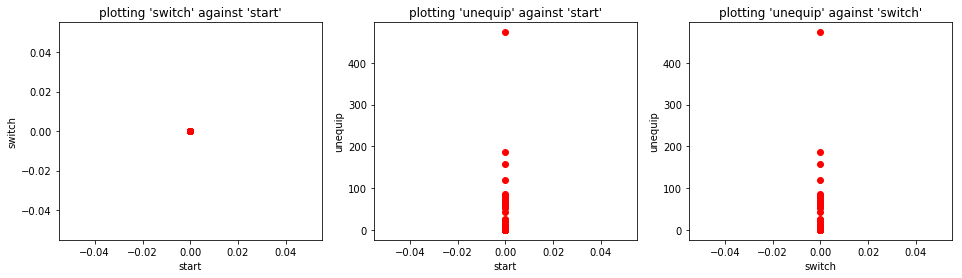

In [97]:
graphsProgressBar.value = 0
for i in range(0,len(columnAllData.columns)):
    xcolumnname = columnAllData.columns[i]
    for j in range(i+1,len(columnAllData.columns)):
        ycolumnname = columnAllData.columns[j]
        
        # actual plotting
        position = 131 + (graphsProgressBar.value % 3)

        if graphsProgressBar.value % 3 == 0:
            fig = plt.figure(figsize=(16,4))

        ax = fig.add_subplot(position)
        subplotFromAllUsersData(
                                ax,
                                columnAllData,
                                xcolumnname,
                                ycolumnname
                            )
        
        graphsProgressBar.value += 1
print("done in " + str(graphsProgressBar.value) + " steps.")